<a href="https://colab.research.google.com/github/Iksora03/Deep-Learning/blob/master/ResNeXt-50_Covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14.0
!pip install git+https://github.com/keras-team/keras-applications/
!pip install keras==2.2.4

     |████████████████████████████████| 109.2MB 30kB/s 
     |████████████████████████████████| 491kB 54.0MB/s 
     |████████████████████████████████| 3.2MB 70.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Cloning https://github.com/keras-team/keras-applications/ to /tmp/pip-req-build-bu0nnoa5
  Running command git clone -q https://github.com/keras-team/keras-applications/ /tmp/pip-req-build-bu0nnoa5
  Created wheel for Keras-Applications: filename=Keras_Applications-1.0.8-cp36-none-any.whl size=62000 sha256=57d3c599b59cfe30fe64ae320e9a5632098dfc9351ffc99bcaeb611e368d78bc
  Stored in directory: /tmp/pip

In [0]:
import tensorflow as tf; print(tf.__version__)
import keras; print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
!unzip Covid_Data_GradientCrescent.zip

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:00, 169MB/s]
Archive:  Covid_Data_GradientCrescent.zip
replace all/test/covid/nejmoa2001191_f3-PA.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import numpy as np
import tensorflow as tf
DATASET_PATH = "/content/two/train"
test_dir = "/content/two/test"
IMAGE_SIZE = (150, 150)
NUM_CLASSES = len("79")
BATCH_SIZE = 10 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 50
LEARNING_RATE =0.0005 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode="constant")

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="binary",)

valid_batches = train_datagen.flow_from_directory(test_dir,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="binary",
 
 
 )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [0]:
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [0]:
%%time
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/two/train', # this is where you specify the path to the main data folder
                                                 target_size=(150,150),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_batches = train_datagen.flow_from_directory('/content/two/test',
                                                   target_size=(150,150),
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
CPU times: user 8.54 ms, sys: 3.06 ms, total: 11.6 ms
Wall time: 206 ms


In [0]:
from keras_applications.resnext import ResNeXt50
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [0]:
%%time
conv_base = ResNeXt50(weights='imagenet',
                  backend=keras.backend,
                  layers=keras.layers,
                  models=keras.models,
                  include_top=False,
                  utils=keras.utils,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),
              metrics=["acc"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnext50 (Model)            (None, 5, 5, 2048)        23048128  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 36,155,841
Trainable params: 36,087,617
Non-trainable params: 68,224
_________________________________________________________________
CPU times: user 17.8 s, sys: 308 ms, total: 18.1 s
Wall time: 17.8 s


In [0]:
STEP_SIZE_TRAIN = train_batches.n//train_batches.batch_size
STEP_SIZE_VALID = valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
 steps_per_epoch = STEP_SIZE_TRAIN,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= 50
 )

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 41s 10s/step - loss: 6.7275 - acc: 0.4750 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 2/50
4/4 [==============================] - 33s 8s/step - loss: 8.4620 - acc: 0.4750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 28s 7s/step - loss: 7.5755 - acc: 0.5300 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 32s 8s/step - loss: 10.0738 - acc: 0.3750 - val_loss: 10.0738 - val_acc: 0.3750
Epoch 5/50
4/4 [==============================] - 32s 8s/step - loss: 7.2531 - acc: 0.5500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 28s 7s/step - loss: 9.7941 - acc: 0.3924 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/50
4/4 [==============================] - 32s 8s/step - loss: 6.8502 - acc: 0.5750 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 8/50
4/4 [==============================] - 27s 7s/step - loss: 10.1449 - acc: 0.3706 - val_loss: 12.0886 

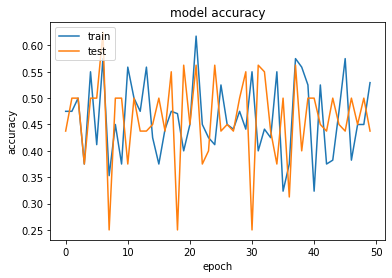

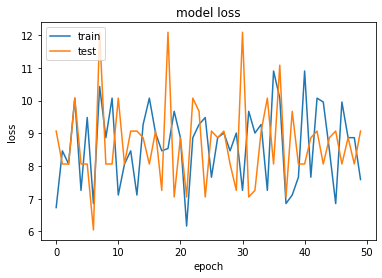

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
STEP_SIZE_TRAIN = train_batches.n//train_batches.batch_size
STEP_SIZE_VALID = valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
 steps_per_epoch = 10,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= 100
 )

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 100s 10s/step - loss: 6.3087 - acc: 0.5600 - val_loss: 7.1741 - val_acc: 0.5500
Epoch 2/100
10/10 [==============================] - 81s 8s/step - loss: 6.9521 - acc: 0.5639 - val_loss: 5.9784 - val_acc: 0.6250
Epoch 3/100
10/10 [==============================] - 82s 8s/step - loss: 7.5472 - acc: 0.5266 - val_loss: 8.9676 - val_acc: 0.4375
Epoch 4/100
10/10 [==============================] - 78s 8s/step - loss: 7.9141 - acc: 0.5036 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/100
10/10 [==============================] - 78s 8s/step - loss: 6.0470 - acc: 0.6207 - val_loss: 8.9676 - val_acc: 0.4375
Epoch 6/100
10/10 [==============================] - 78s 8s/step - loss: 8.5093 - acc: 0.4662 - val_loss: 4.9820 - val_acc: 0.6875
Epoch 7/100
10/10 [==============================] - 81s 8s/step - loss: 7.4331 - acc: 0.5338 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 8/100
10/10 [==============================] - 78s 8s/step - loss: 6.8488 - acc: 0.5704

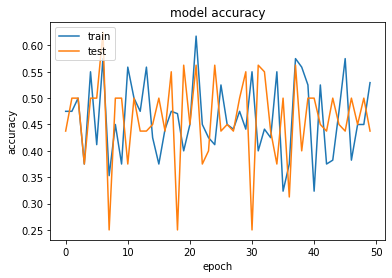

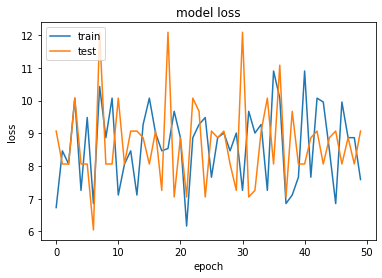

In [0]:
import matplotlib.pyplot as plt
from keras.models import load_model

plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()